# Demo: __`scikit-learn`__
* popular Python library providing efficient implementation of a large number of ML algorithms
* designed to be clean and uniform across tools
* consistent data representation and common interface

# __`scikit-learn`__ Data Representation
<img style="height: 400px;" src="images/scikit-learn-data.png">

* each _observation_ (or _sample_ or _data point_) typically has multiple _features_
  * that's why each sample is represented as a _row_ above
  * each row can, and often does, contain multiple features
* the _target_, however, is one-dimensional, i.e., we are making _one_ prediction (e.g., age, home price, cancer vs. benign, etc.)

## Let's run the "Hello, World!" of Machine Learning
* The "iris" dataset
* Three different species of iris plants: Setosa, Virginica, Versicolour
* Data collected by Ronald Fisher in 1936
  * length and width of the petal and the sepal

![Iris Plant](images/Iris_versicolor_3.jpg)

In [1]:
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

## Above we imported the Python packages we need
* In the case of __`sklearn`__, we need the __`datasets`__ _module_ (a file of Python code) which contains some oft-used datasets

In [2]:
# load the iris dataset that ships with scikit learn
iris = datasets.load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                   columns=iris['feature_names'] + ['target'])
print(data.shape)
data.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
data['target'].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


min 4.3
max 7.9

Q1 = 5.1
median = Q2 = 5.8
Q3 = 6.4

IQR = Q3 - Q1


lower_hinge = Q1 - 1.5*IQR

upper_hinge = Q3 + 1.5*IQR


Outlier = below lower hinge or above upper hinge




lower_exteme_hinge = Q1 - 3*IQR

upper_extreme_hinge = Q3 + 3*IQR

Extreme outliers = below extreme lower hinge or above extreme upper hinge

In [5]:
sorted(data['sepal length (cm)'])

[4.3,
 4.4,
 4.4,
 4.4,
 4.5,
 4.6,
 4.6,
 4.6,
 4.6,
 4.7,
 4.7,
 4.8,
 4.8,
 4.8,
 4.8,
 4.8,
 4.9,
 4.9,
 4.9,
 4.9,
 4.9,
 4.9,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.1,
 5.1,
 5.1,
 5.1,
 5.1,
 5.1,
 5.1,
 5.1,
 5.1,
 5.2,
 5.2,
 5.2,
 5.2,
 5.3,
 5.4,
 5.4,
 5.4,
 5.4,
 5.4,
 5.4,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.6,
 5.6,
 5.6,
 5.6,
 5.6,
 5.6,
 5.7,
 5.7,
 5.7,
 5.7,
 5.7,
 5.7,
 5.7,
 5.7,
 5.8,
 5.8,
 5.8,
 5.8,
 5.8,
 5.8,
 5.8,
 5.9,
 5.9,
 5.9,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.0,
 6.1,
 6.1,
 6.1,
 6.1,
 6.1,
 6.1,
 6.2,
 6.2,
 6.2,
 6.2,
 6.3,
 6.3,
 6.3,
 6.3,
 6.3,
 6.3,
 6.3,
 6.3,
 6.3,
 6.4,
 6.4,
 6.4,
 6.4,
 6.4,
 6.4,
 6.4,
 6.5,
 6.5,
 6.5,
 6.5,
 6.5,
 6.6,
 6.6,
 6.7,
 6.7,
 6.7,
 6.7,
 6.7,
 6.7,
 6.7,
 6.7,
 6.8,
 6.8,
 6.8,
 6.9,
 6.9,
 6.9,
 6.9,
 7.0,
 7.1,
 7.2,
 7.2,
 7.2,
 7.3,
 7.4,
 7.6,
 7.7,
 7.7,
 7.7,
 7.7,
 7.9]

<AxesSubplot:>

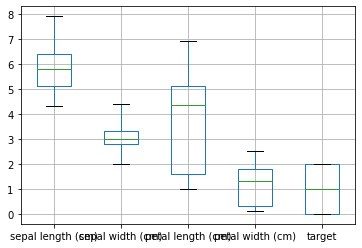

In [6]:
data.boxplot(whis = 3)

## Let's plot the sepal length vs. the sepal width

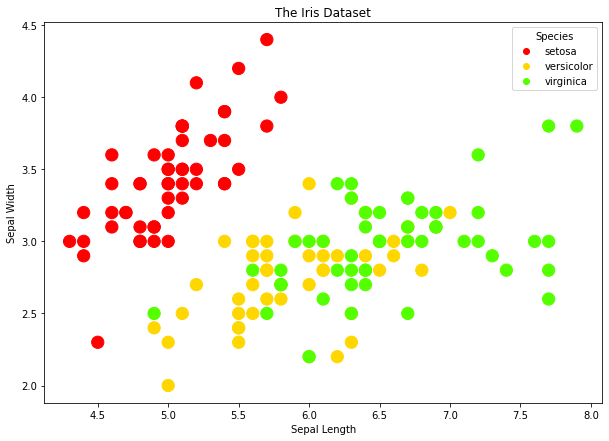

In [7]:
plt.rcParams["figure.figsize"] = (10, 7)
plt.title('The Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
cmap = plt.get_cmap('prism')
norm = plt.Normalize(iris.target.min(), iris.target.max())
handles = [plt.Line2D([0, 0], [0, 0], color=cmap(norm(i)), marker='o', linestyle='', label=label)
           for i, label in enumerate(iris.target_names)]
plt.legend(handles=handles, title='Species', loc='upper right')
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=iris.target, cmap='prism', s=150);

In [8]:
data.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0


In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
feature_matrix = data.drop(columns='target')
feature_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
abc = data.copy()
abc.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [24]:
abc.drop(1, inplace=True)
abc

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [15]:
# abc.set_index('My_Index', inplace=True)
# abc.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
My_Index,,,,,
Index,5.1,3.5,1.4,0.2,0.0
Index,4.9,3.0,1.4,0.2,0.0
Index,4.7,3.2,1.3,0.2,0.0
Index,4.6,3.1,1.5,0.2,0.0
Index,5.0,3.6,1.4,0.2,0.0


In [17]:
# abc.drop('Index', inplace=True)
# abc

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
My_Index,,,,,


In [25]:
# Set up the feature matrix
X_iris = data.drop('target', axis=1)
X_iris.shape

(150, 4)

In [26]:
# Set up the target vector
y_iris = iris['target']
y_iris.shape

(150,)

# General Workflow
* Choose an algorithm
* Choose hyperparameters (parameters to the algorithm)
* Arrange data into a features matrix (i.e., 2-D) and target vector (1-D)
* Fit the model to the data with the __`fit()`__ method
* Apply the model to test data (__`predict()`__ or __`transform()`__)

### Algorithm_1 - DecisionTreeClassifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=2)

# Let's split out dataset into training and test, in order to 
# see how well our model actually does.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.25)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [28]:
print(X_train.shape, X_test.shape, sep='\n')

(112, 4)
(38, 4)


In [29]:
# Look at our training accuracy
tree_clf.score(X_train, y_train)

0.9732142857142857

In [30]:
tree_clf.score(X_test, y_test)

0.9210526315789473

In [31]:
# Let's check the test data, one by one, and see how
# many we got right.
correct = 0

for i in range(X_test.shape[0]):
    row = np.array(X_test.iloc[i, :])
    pred = tree_clf.predict([row])
    print(f'prediction for {row} is {pred[0]}, actual is {y_test[i]}', end='')
    if pred[0] == y_test[i]:
        correct += 1
    else:
        print('*', end='')
    print()
print(correct / X_test.shape[0])

prediction for [5.8 2.8 5.1 2.4] is 2, actual is 2
prediction for [5.5 2.3 4.  1.3] is 1, actual is 1
prediction for [6.3 3.3 4.7 1.6] is 1, actual is 1
prediction for [6.1 2.8 4.  1.3] is 1, actual is 1
prediction for [7.2 3.  5.8 1.6] is 1, actual is 2*
prediction for [5.  3.6 1.4 0.2] is 0, actual is 0
prediction for [4.4 3.2 1.3 0.2] is 0, actual is 0
prediction for [5.5 2.4 3.8 1.1] is 1, actual is 1
prediction for [6.8 3.2 5.9 2.3] is 2, actual is 2
prediction for [7.2 3.6 6.1 2.5] is 2, actual is 2
prediction for [5.  2.3 3.3 1. ] is 1, actual is 1
prediction for [4.3 3.  1.1 0.1] is 0, actual is 0
prediction for [6.3 2.8 5.1 1.5] is 1, actual is 2*
prediction for [7.6 3.  6.6 2.1] is 2, actual is 2
prediction for [6.3 2.7 4.9 1.8] is 2, actual is 2
prediction for [5.8 2.7 3.9 1.2] is 1, actual is 1
prediction for [4.8 3.1 1.6 0.2] is 0, actual is 0
prediction for [5.7 3.  4.2 1.2] is 1, actual is 1
prediction for [6.1 2.8 4.7 1.2] is 1, actual is 1
prediction for [4.8 3.4 1.9 0

C:\Users\avy20\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\avy20\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\avy20\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\avy20\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\avy20\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with f

### Algorithm_2 - LogisticRegression

In [33]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.25, random_state=25)

logistic_model.fit(X_train, y_train)

LogisticRegression()

In [35]:
print(X_train.shape, X_test.shape, sep='\n')

(112, 4)
(38, 4)


In [36]:
# Look at our training accuracy
logistic_model.score(X_train, y_train)

0.9821428571428571

In [37]:
logistic_model.score(X_test, y_test)

0.9736842105263158

In [38]:
# Let's check the test data, one by one, and see how
# many we got right.
correct = 0

for i in range(X_test.shape[0]):
    row = np.array(X_test.iloc[i, :])
    pred = logistic_model.predict([row])
    print(f'prediction for {row} is {pred[0]}, actual is {y_test[i]}', end='')
    if pred[0] == y_test[i]:
        correct += 1
    else:
        print('*', end='')
    print()
print(correct / X_test.shape[0])

prediction for [5.2 3.4 1.4 0.2] is 0, actual is 0
prediction for [6.3 2.5 4.9 1.5] is 1, actual is 1
prediction for [5.9 3.2 4.8 1.8] is 2, actual is 1*
prediction for [6.  3.4 4.5 1.6] is 1, actual is 1
prediction for [6.4 2.8 5.6 2.1] is 2, actual is 2
prediction for [6.7 3.1 4.4 1.4] is 1, actual is 1
prediction for [6.1 3.  4.9 1.8] is 2, actual is 2
prediction for [4.4 3.2 1.3 0.2] is 0, actual is 0
prediction for [5.5 2.4 3.7 1. ] is 1, actual is 1
prediction for [5.  2.3 3.3 1. ] is 1, actual is 1
prediction for [5.1 3.7 1.5 0.4] is 0, actual is 0
prediction for [5.4 3.4 1.5 0.4] is 0, actual is 0
prediction for [5.  3.4 1.6 0.4] is 0, actual is 0
prediction for [6.3 2.8 5.1 1.5] is 2, actual is 2
prediction for [4.6 3.4 1.4 0.3] is 0, actual is 0
prediction for [6.6 2.9 4.6 1.3] is 1, actual is 1
prediction for [7.2 3.2 6.  1.8] is 2, actual is 2
prediction for [6.9 3.1 5.4 2.1] is 2, actual is 2
prediction for [5.6 2.9 3.6 1.3] is 1, actual is 1
prediction for [5.6 2.7 4.2 1.

C:\Users\avy20\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\avy20\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\avy20\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\avy20\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\avy20\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warni